# Purpose: Approximately integrate methane emissions starting from 1750, and compare to data

Clear all variables and reset the working directory and import necessary libraries

In [1]:
%reset -f
import os
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import erf
from scipy.optimize import curve_fit
import math
os.chdir('C:\\Users\\cd7\\Desktop\\Heat17CH4')

Read two input files separately and assign the year values and methane concentration data

In [2]:
df1 = pd.read_excel('heat18parameters04jan.xlsx')
df1.to_csv('heat18parameters04jan.csv',header=False,index=False)
df1 = pd.read_csv('heat18parameters04jan.csv')
# print (df1)

df2 = pd.read_excel('heat17-ch4-1-2017dec14.xlsx') # results of excel sheet from code of radiative forcing
df2.to_csv('heat17-ch4-1-2017dec14.csv',header=False,index=False)
df3 = pd.read_csv('heat17-ch4-1-2017dec14.csv')
df3.drop(df3.index[[-1]],inplace=True)
# print (df3)

Rename the files

In [3]:
out1 = 'historical'
out2 = 'ch4'
months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'] # abbreviations for months to insert in output file name
date = datetime.date.today().strftime("%Y-%m-%d")
date_split = date.split('-') # split the date string we create by symbol "-"
yrs = str(int(date_split[0])-2000) # real years minus 2000
seq = [out1, yrs, out2,months[int(date_split[1])-1],date_split[2]]
seperator = ','
filename = seperator.join(seq).replace(',', '')

In [4]:
b9 = df1.iloc[8,0:4]
ch40 = df1.iloc[18,2]
print (ch40)
ndrop = 1749
df4 = df3.iloc[ndrop:]
print (df4)

722.065
     Julian                 ppb
1749   1750   742.5796049119058
1750   1751   742.1584623598503
1751   1752   741.9478910838226
1752   1753   742.0531767218364
1753   1754   742.2637479978641
1754   1755   742.5796049119058
1755   1756   743.0007474639614
1756   1757   743.5271756540308
1757   1758   744.2641751201279
1758   1759   745.0011745862251
1759   1760     745.94874532835
1760   1761   747.0016017084888
1761   1762   748.1597437266415
1762   1763    749.528457020822
1763   1764   751.0024559530162
1764   1765   752.6870261612385
1765   1766   754.3715963694606
1766   1767   756.0561665776827
1767   1768   757.7407367859048
1768   1769   759.4253069941268
1769   1770    761.004591564335
1770   1771   762.3733048585156
1771   1772   763.6367325146821
1772   1773   764.6895888948209
1773   1774   765.3213027229042
1774   1775   765.7424452749597
1775   1776   765.8477309129736
1776   1777   765.7424452749597
1777   1778   765.6371596369459
1778   1779   765.4265883609181


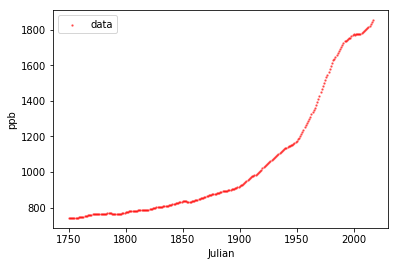

In [5]:
df4 = df4.astype(float)
df4.plot.scatter(x='Julian',y='ppb',s=2,color = 'r', alpha = 0.5,label ='data',marker='o')

In [6]:
life = b9[3]  # (* from heat17ch4emissions14dec.nb *)
print (life)
eps = life/b9[2]
def yrs(t):
    y = (t - b9[1])/b9[2]
    return y
def u(x):
    y = 1/(1 + np.exp(-x))
#     y = 1/(1 + math.exp(-x))
    return y
x0 = (1750 - b9[1])/b9[2]
u0 = 1/(1 + np.exp(-x0))
print (eps,x0,u0)
def ch4fit(u):
    y = ch40 + life*b9[0]*u(x)*(1-eps*(1-u(x))-eps**2*(1-u(x))(1-2*u(x)))-life*b9[0]*u0*(1-eps*(1-u0)-eps**2(1-u0)*(1-2*u0))
    return y

9.51428
0.2299045998898114 -5.410597434732601 0.00444908666345861


In [7]:
t0 = ndrop + 1
tmax = 2017
t1 = 1950
# t = range(t0,tmax+1)
t = list(range(t0,tmax+1))
print (t)
plt.plot(t,ch4fit(u(x(t))),label="simulation")
# q = eval('ch4fit(u(x(t1)))')
# c = eval('x(t1)')
# d = eval('u(c)')
# e = eval('ch4fit(d)') 
# # print (c)
# print (e)
# ch40 = eval('ch4raw(mlist)')

[1750, 1751, 1752, 1753, 1754, 1755, 1756, 1757, 1758, 1759, 1760, 1761, 1762, 1763, 1764, 1765, 1766, 1767, 1768, 1769, 1770, 1771, 1772, 1773, 1774, 1775, 1776, 1777, 1778, 1779, 1780, 1781, 1782, 1783, 1784, 1785, 1786, 1787, 1788, 1789, 1790, 1791, 1792, 1793, 1794, 1795, 1796, 1797, 1798, 1799, 1800, 1801, 1802, 1803, 1804, 1805, 1806, 1807, 1808, 1809, 1810, 1811, 1812, 1813, 1814, 1815, 1816, 1817, 1818, 1819, 1820, 1821, 1822, 1823, 1824, 1825, 1826, 1827, 1828, 1829, 1830, 1831, 1832, 1833, 1834, 1835, 1836, 1837, 1838, 1839, 1840, 1841, 1842, 1843, 1844, 1845, 1846, 1847, 1848, 1849, 1850, 1851, 1852, 1853, 1854, 1855, 1856, 1857, 1858, 1859, 1860, 1861, 1862, 1863, 1864, 1865, 1866, 1867, 1868, 1869, 1870, 1871, 1872, 1873, 1874, 1875, 1876, 1877, 1878, 1879, 1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890, 1891, 1892, 1893, 1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915, 191

TypeError: 'numpy.ndarray' object is not callable